# Tittle
 Recording the EKG Lead II

# Purspose
Electrocardiography is the study of the electrical activity of the heart. Cardiac muscle cells are the sources of this electrical activity. Electrocardiograms (EKG or ECG) are graphical records that measure the change in the ele ctrical activity of the heart.

# Procedure
**1.**To get things started: Before you turn anything on, be sure the IWX/214 unit
is plugged in, and that the IWX/214 unit is connected to the laptop by USB cable.Be sure that the CAAMI 504 EEG cable is inserted into the isolated inputs of Channels 1 and 2 of the IWX/214. Be sure that the three color coded lead wires are correctly inserted in the lead pedestal of the CAAMI 504 EEG cable.
Insert the connectors on the red, black, and green electrode lead wires into the color coded matching sockets on the lead pedestal of the ECG cable.
The white and brown lead wires can be removed and neatly placed in the Iworx case, you do not need them for Lab 10, but after the week is over they will need to be replaced. Once everything is connected, FIRST turn on the laptop
and allow it to fully boot up before you turn on the IWX/214 unit.
Once the Iworx unit is on, the red indicator light on the Iworx unit should light up and you may hear the USB chime from the laptop if the laptop does not default to mute (many are set to default to mute).
**2.**Open the Labscribe3 program by clicking on the Labscribe3 icon on the desktop. As soon as the program opens, you should see a window pop up that says “Hardware found IWX214:200824,” click “OK".
3.In the second from the top row (the row that says “File Edit View Tools Settings Advanced External Device Help”), click on the “Settings” tab.
About one third of the way down the drop down window should be a tab called “
Human Heart.” Click on that tab and that should lead you to a tab called “
ECG HeartSounds.” Click on that tab and the main window will look like this after you close the pdf file:
4.Since Lab 10 is about ECG only, we can hide the lower “Heart Sounds” row by clicking on the symbol to the left of the row label, then clicking on the “
Hide” tab, and then “Yes”.
5.Remove the disposable ECG electrodes from its envelope and snap the lead wires
ontothe electrodes while the electrodes are still on the plastic shield.
Instruct the subject to remove all jewelry from their wrists and ankles. Use an alcohol swab to clean a region of skin on the subject’s right wrist, and the inside of both ankles. Let the area dry.
6.Apply the black (1)electrode to the scrubbed area on the right wrist. Repeat Steps 5 and 6 for the inside of the left ankle and the inside of the right ankle, so that the following Lead II is arranged: the black 1 lead is attached to the right wrist,the red +1 lead is connected to the left ankle,the green C
or ground) lead is connected to the right ankle.
7.Instruct the subject to sit quietly with their hands in their lap. If the subject moves, the ECG trace will move off the top or bottom of the screen. If the subject moves any muscles in the arms or upper body, electromyograms (EMGs) from the muscles will appear on the ECG recording as noise.
8.Click on the Record button, located on the upper right side of the LabScribe
Main window. The signal should begin scrolling across the screen.
If the ECG appears upside down in Lead II (upside down P, R and T waves), click on the upside down triangle on the far left of “A1:ECG 0.335Hz,” then click on the first option “Invert.” This should correct the image of your Lead II ECG to be “right side up,”but do this ONLY ONCE.
9.When you have a suitable trace, type <Subject’s Name> Lead II in the
Mark box to the right of the Mark button. Press the Enter key on the keyboard
after the recording has started to attach the comment to the data.10.
Click on the AutoScale tab at the upper margin of the ECG channel look for the row that says on the left “A1:ECG 0.335Hz” the AutoScale tab is the second icon after “Hz,” it looks like a magnifying glass with a symbol on it. Your recording
should look like the figure in step #4. If the ECG waves appear too compressed (too close together), consider clicking the tab above the “Mark” tab that looks like a snow capped pyramid. When the mouse is on top of this tab, it will say “
Half Display Time.” Clicking this tab will spread out your ECG patterns for step 11. If you overdo that last step, reverse it by clicking on
the tab that looks like double pyramids (“Double Display Time”) just to the right of theHalf Display Time tab.
11.Record for approximately one minute and then click Stop to halt recording.
Label one set of the five ECG waves (P, Q, R, S andT). Notice that every cycle is similar but not identical, and the distances between the QRS complexes may alter slightly.

# Results


In [9]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Discussion
The EKG records the electrical signals of the heart. It is a painless procedure to detect abnormalities of the heart.

In [10]:
data = pd.read_csv (r'./lab 10 1.txt', sep = '\t')
data


,Time,Lead II
0,0.00,0.000000
1,0.01,0.000000
2,0.02,0.000000
3,0.03,0.000000
4,0.04,0.000000
...,...,...
1454,14.54,0.017423
1455,14.55,-0.026362
1456,14.56,-0.059841
1457,14.57,-0.082315


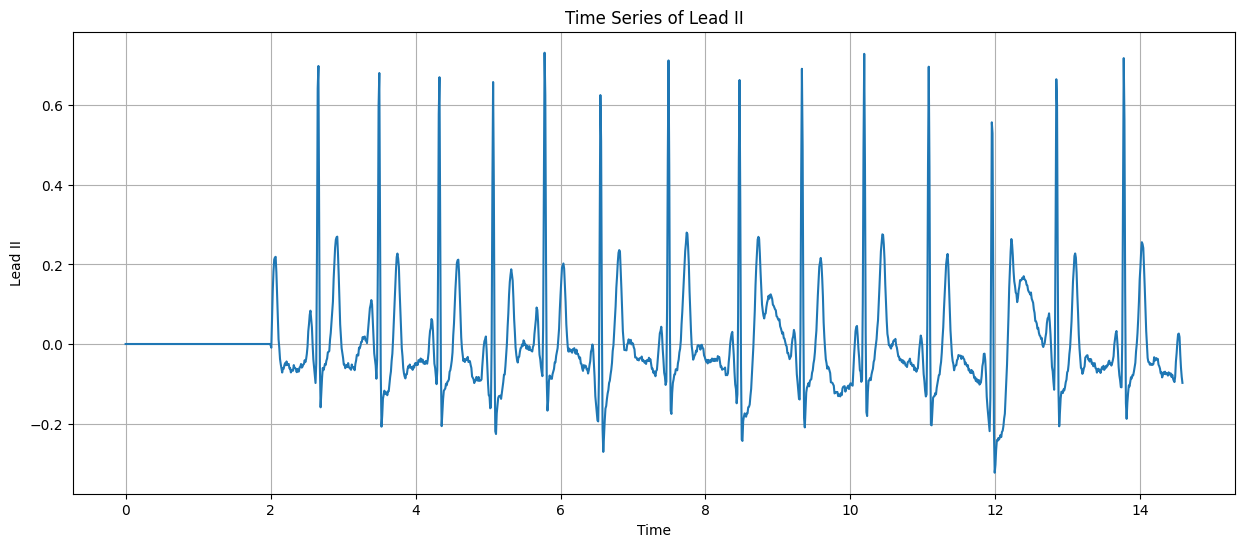

In [11]:
df = pd.DataFrame(data)

# Plot the data to visually inspect
plt.figure(figsize=(15, 6))
plt.plot(df['Time'], df['Lead II'])
plt.xlabel('Time')
plt.ylabel('Lead II')
plt.title('Time Series of Lead II')
plt.grid(True)
plt.show()

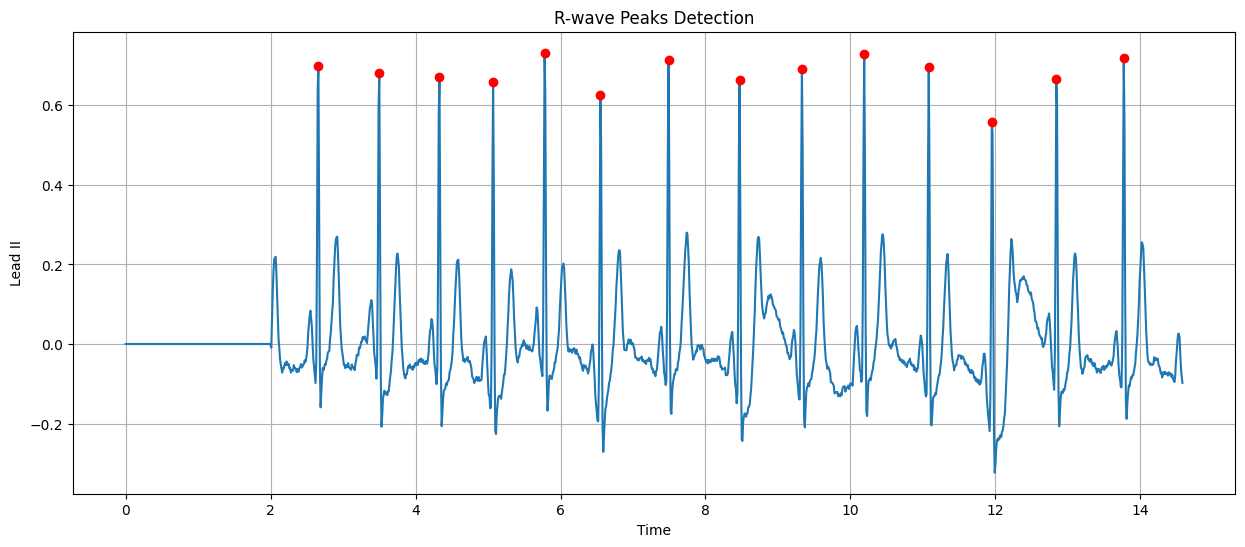

In [12]:
# Detect R-wave peaks
peak_indices, _ = find_peaks(df['Lead II'], height=.3)  # You might need to adjust parameters like distance, height, etc.
# Plot the data with detected peaks
plt.figure(figsize=(15, 6))
plt.plot(df['Time'], df['Lead II'])
plt.plot(df['Time'].iloc[peak_indices], df['Lead II'].iloc[peak_indices], 'ro')
plt.xlabel('Time')
plt.ylabel('Lead II')
plt.title('R-wave Peaks Detection')
plt.grid(True)
plt.show()

In [13]:
# Calculate RR intervals
rr_intervals = df['Time'].iloc[peak_indices].diff().dropna().values

# Calculate heart rate in BPM
average_rr_interval = rr_intervals.mean()
heart_rate = 60 / average_rr_interval

print(f"Average RR interval: {average_rr_interval:.2f} seconds")
print(f"Heart rate: {heart_rate:.2f} BPM")

Average RR interval: 0.85 seconds
Heart rate: 70.21 BPM


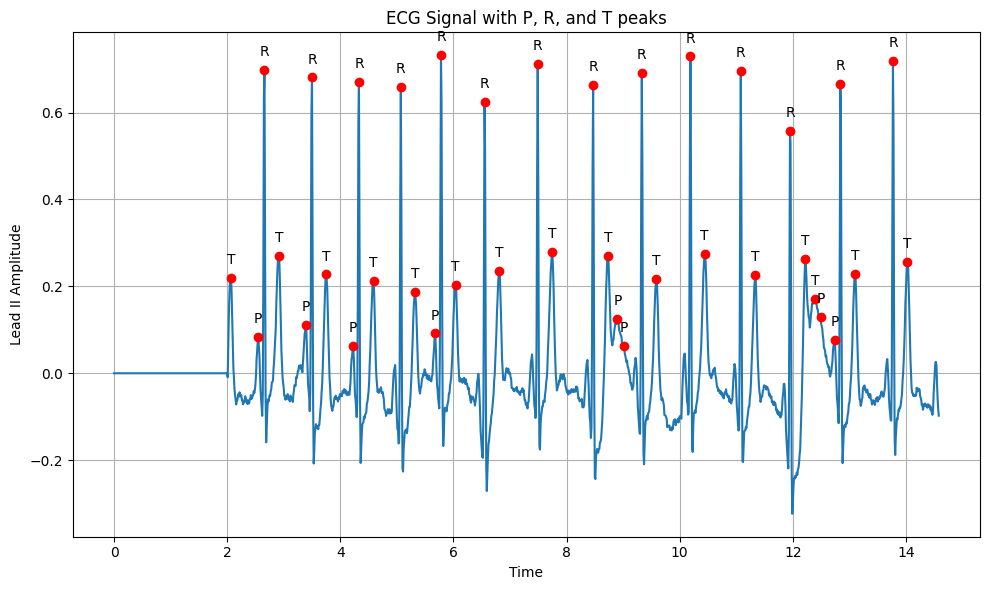

In [15]:
# Detect all peaks without amplitude restriction
peaks, _ = find_peaks(df['Lead II'], distance=10, height=0.05) #Distance and height will need to change depending upon your data

# Classify peaks based on their amplitude
def classify_peak(amp):
    if amp > 0.3: #This height will depend on your data
        return 'R'
    elif 0.13 <= amp <= 0.3: #This height will depend on your data
        return 'T'
    else:
        return 'P'

labels = [classify_peak(df['Lead II'][peak]) for peak in peaks]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Lead II'], label='ECG Signal')

# Annotate each peak based on its label
for peak, label in zip(peaks, labels):
    plt.plot(df['Time'][peak], df['Lead II'][peak], "ro")
    plt.annotate(label, (df['Time'][peak], df['Lead II'][peak]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Time')
plt.ylabel('Lead II Amplitude')
plt.title('ECG Signal with P, R, and T peaks')
plt.grid(True)
plt.tight_layout()
plt.show()

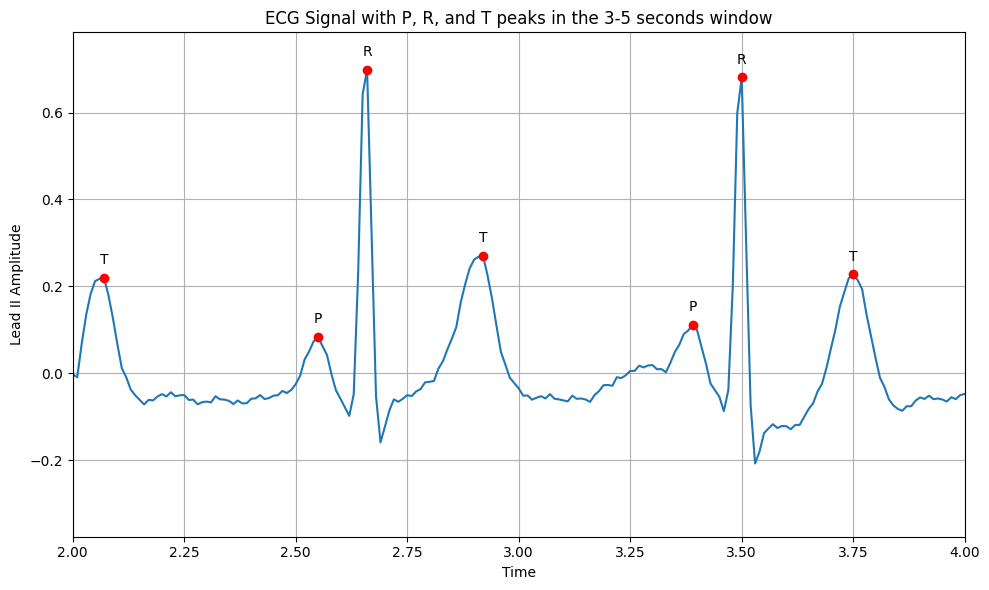

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Lead II'], label='ECG Signal')

# Annotate each peak based on its label
for peak, label in zip(peaks, labels):
    plt.plot(df['Time'][peak], df['Lead II'][peak], "ro")
    plt.annotate(label, (df['Time'][peak], df['Lead II'][peak]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Time')
plt.ylabel('Lead II Amplitude')
plt.title('ECG Signal with P, R, and T peaks in the 3-5 seconds window')
plt.grid(True)

# Set x-axis limits to zoom into the 3-5 seconds time window
plt.xlim(2, 4)

plt.tight_layout()
plt.show()

# Conclusion
To be able to identify and explain each componet of the EKG. Also, be able to identify all the instrumets used to measure the electrical signals of the heart and to know when there is an abnormality.